# __Predictive Modeling__

### 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline 

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn import metrics

In [4]:
DF = pd.read_csv('cubic_zirconia.csv')

In [125]:
DF.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [127]:
DF.tail()

,carat,cut,color,clarity,depth,table,x,y,z,price
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [129]:
DF.shape

(26967, 10)

In [123]:
DF.describe()


,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.785860,61.745147,57.407702,5.729438,5.731334,3.537316,3939.518115
std,0.444042,1.412860,2.090151,1.124638,1.116593,0.694826,4024.864666
min,0.200000,50.800000,51.600000,3.730000,3.710000,1.530000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,2.020000,73.600000,63.300000,9.300000,9.260000,5.750000,18818.000000


In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [8]:
print("Number of Duplicates ",DF.duplicated().sum())

Number of Duplicates  0


In [9]:
DF.drop('Unnamed: 0', inplace=True, axis=1)

In [10]:
DF.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [11]:
for column in DF.columns:
    if DF[column].dtype == 'object':
        print(column.upper(),': ',DF[column].nunique())
        print(DF[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




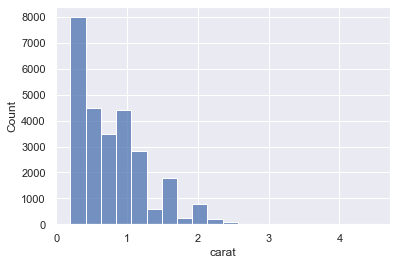

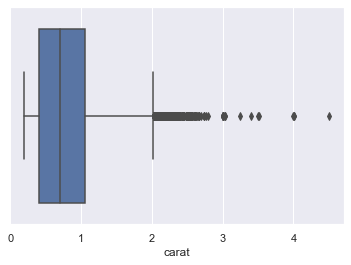

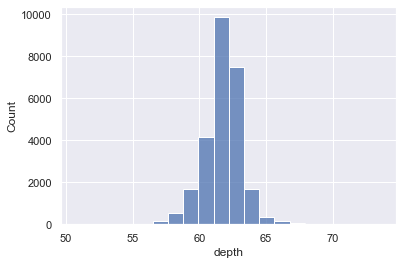

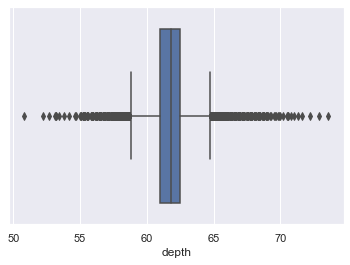

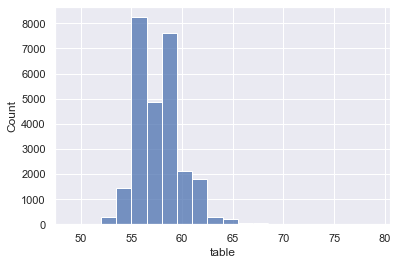

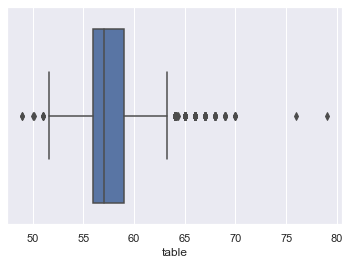

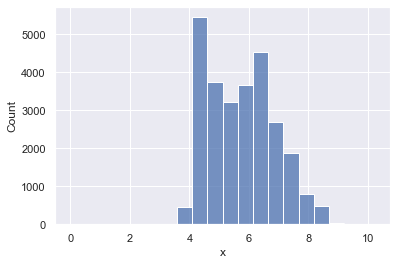

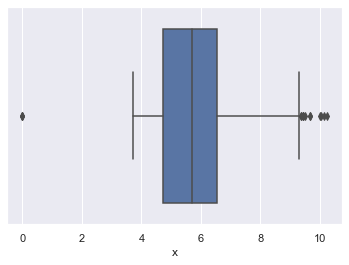

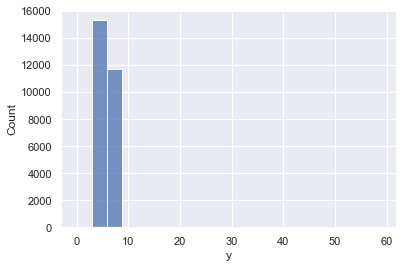

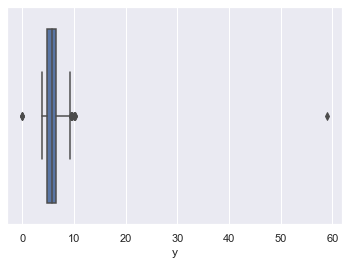

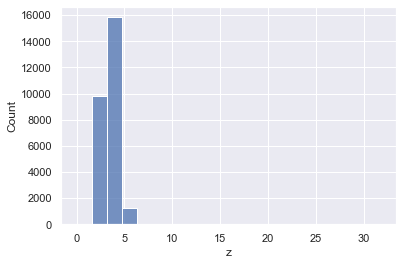

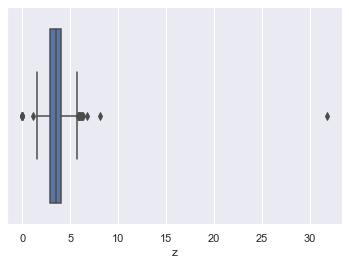

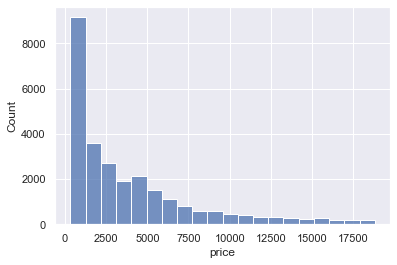

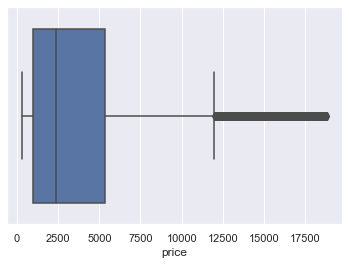

In [12]:
def univariateAnalysis(column, nbins):
    plt.figure()
    sns.histplot(DF[column],bins= nbins, kde=False)
    plt.show()

    plt.figure()
    ax=sns.boxplot(x=DF[column])
    plt.show()

gem = DF.select_dtypes(include = ['float64', 'int64'])
gem_col = list(gem.columns.values)
len(gem_col)

for x in gem_col:
 univariateAnalysis(x, 20)

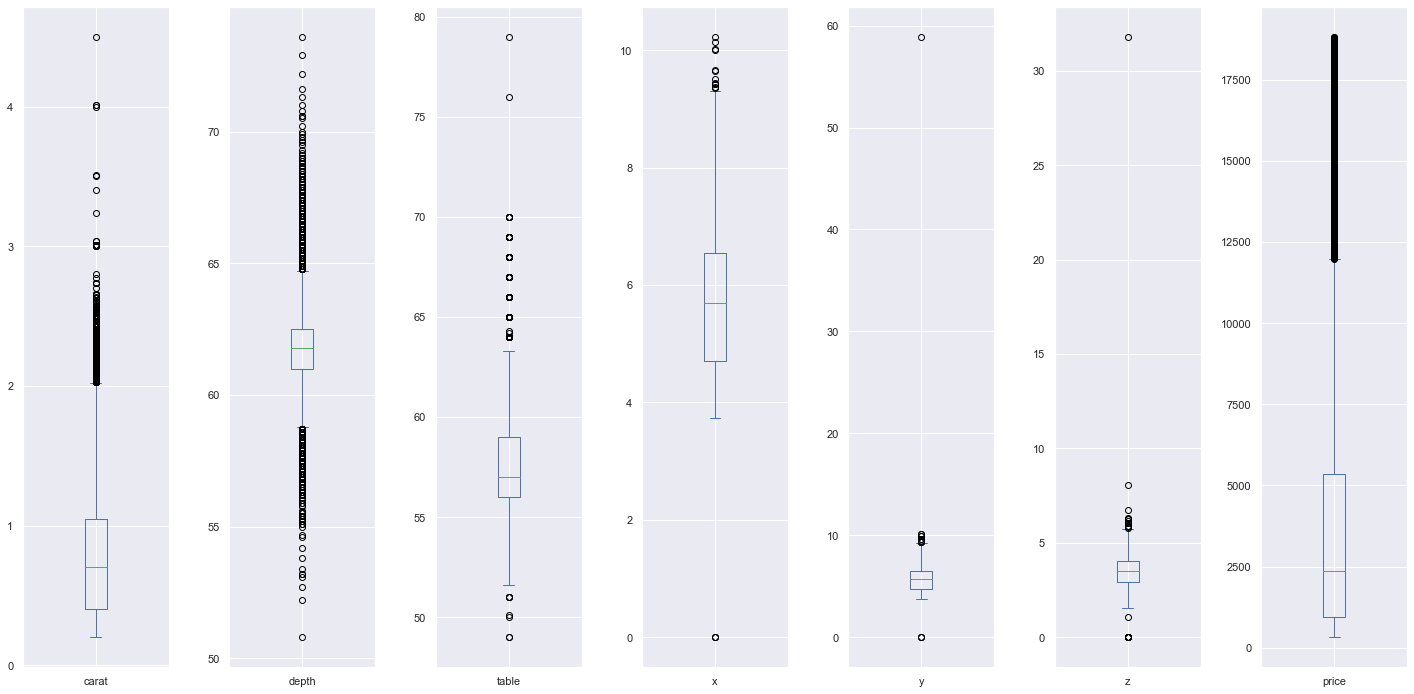

In [13]:
DF.plot(kind='box',subplots=True,figsize=(20,10))
plt.tight_layout(pad=2.0)

In [14]:
from scipy import stats
numeric_cols = DF.select_dtypes(include=[np.number]).columns
numeric_cols=numeric_cols.delete(-1) #Removed the target column price

In [15]:
z=np.abs(stats.zscore(DF[numeric_cols]))
listin= np.where(z>3)

In [16]:
outlier = list((int(j) for i in listin for j in i))
print("the number of outliers are ", len(outlier) )

the number of outliers are  892


In [17]:
print("replace outliers")

def outlier(x): # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)
DF[numeric_cols]=DF[numeric_cols].apply(outlier)
DF.describe()


replace outliers


,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.785860,61.745147,57.407702,5.729438,5.731334,3.537316,3939.518115
std,0.444042,1.412860,2.090151,1.124638,1.116593,0.694826,4024.864666
min,0.200000,50.800000,51.600000,3.730000,3.710000,1.530000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,2.020000,73.600000,63.300000,9.300000,9.260000,5.750000,18818.000000


carat       AxesSubplot(0.125,0.125;0.0945122x0.755)
depth    AxesSubplot(0.238415,0.125;0.0945122x0.755)
table    AxesSubplot(0.351829,0.125;0.0945122x0.755)
x        AxesSubplot(0.465244,0.125;0.0945122x0.755)
y        AxesSubplot(0.578659,0.125;0.0945122x0.755)
z        AxesSubplot(0.692073,0.125;0.0945122x0.755)
price    AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

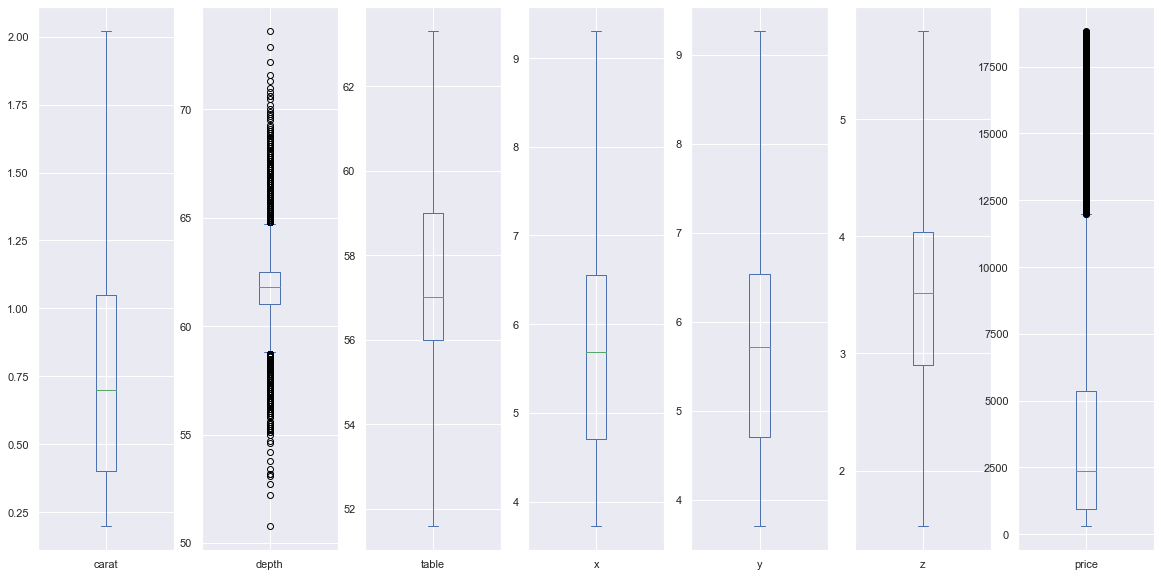

In [18]:
DF.plot(kind='box',subplots=True,figsize=(20,10))

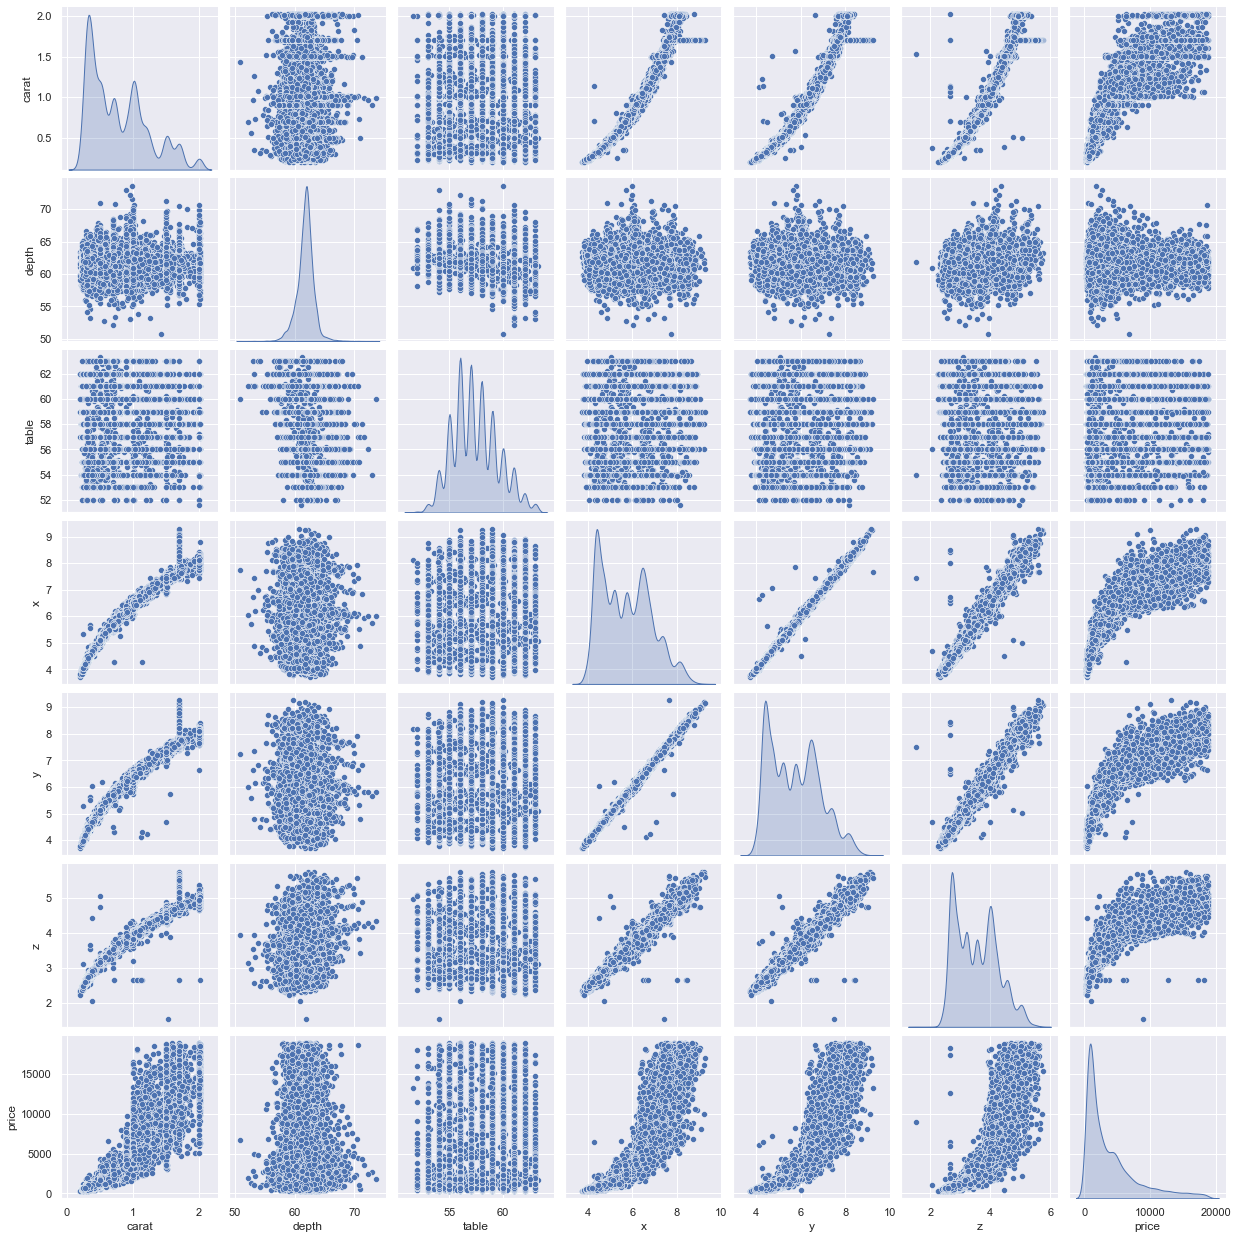

In [19]:
sns.pairplot(DF, diag_kind='kde')

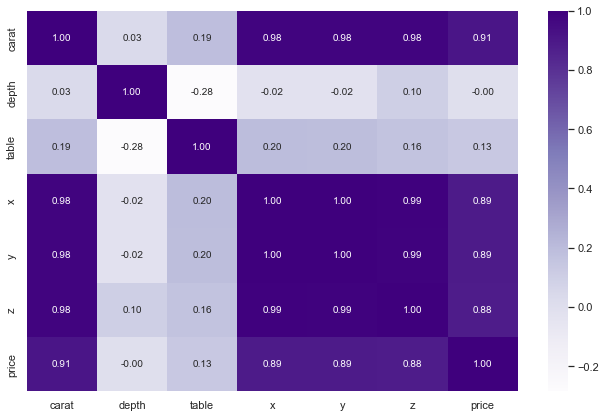

In [20]:
plt.figure(figsize=(11,7))
sns.heatmap(DF.corr(), annot=True,fmt='.2f', cmap='Purples')
plt.show()

## 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [21]:
(DF == 0).all()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
x          False
y          False
z          False
price      False
dtype: bool

In [22]:
DF.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [23]:
from sklearn.impute import SimpleImputer
SI = SimpleImputer(strategy='most_frequent')
impute_df = pd.DataFrame(SI.fit_transform(DF),columns=DF.columns)
impute_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.3,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.7,984
2,0.9,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.8,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [24]:
impute_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [25]:
impute_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   carat    26967 non-null  object
 1   cut      26967 non-null  object
 2   color    26967 non-null  object
 3   clarity  26967 non-null  object
 4   depth    26967 non-null  object
 5   table    26967 non-null  object
 6   x        26967 non-null  object
 7   y        26967 non-null  object
 8   z        26967 non-null  object
 9   price    26967 non-null  object
dtypes: object(10)
memory usage: 2.1+ MB


In [26]:
DF.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.785860,61.745147,57.407702,5.729438,5.731334,3.537316,3939.518115
std,0.444042,1.412860,2.090151,1.124638,1.116593,0.694826,4024.864666
min,0.200000,50.800000,51.600000,3.730000,3.710000,1.530000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,2.020000,73.600000,63.300000,9.300000,9.260000,5.750000,18818.000000


##    1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [27]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [28]:
import category_encoders as ce

In [29]:
encodercut= ce.OrdinalEncoder(cols=['cut'],return_df=True,mapping=[{'col':'cut','mapping': {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}}]) 

In [30]:
df= encodercut.fit_transform(impute_df)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.3,5,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,G,IF,60.8,58.0,4.42,4.46,2.7,984
2,0.9,3,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,F,VS1,61.6,56.0,4.82,4.8,2.96,1082
4,0.31,5,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [31]:
encodercolor= ce.OrdinalEncoder(cols=['color'],return_df=True, 
                                mapping=[{'col':'color','mapping':{'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1}}])
df=encodercolor.fit_transform(df)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.3,5,6,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,IF,60.8,58.0,4.42,4.46,2.7,984
2,0.9,3,6,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,5,VS1,61.6,56.0,4.82,4.8,2.96,1082
4,0.31,5,5,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [32]:
encoderclarity=ce.OrdinalEncoder(cols=['clarity'],return_df=True, mapping=[{'col':'clarity',
                                                                            'mapping': {'FL':11,'IF':10,'VVS1':9,'VVS2':8,'VS1':7,'VS2':6,'SI1':5,'SI2':4,'I1':3,'I2':2,'I3':1}}])
df=encoderclarity.fit_transform(df)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.3,5,6,5,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,10,60.8,58.0,4.42,4.46,2.7,984
2,0.9,3,6,8,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,5,7,61.6,56.0,4.82,4.8,2.96,1082
4,0.31,5,5,9,60.4,59.0,4.35,4.43,2.65,779


In [33]:
df[['carat','depth','table','x','y','z','price']] =df[['carat','depth','table','x','y','z','price']].astype('float64')

In [34]:
from scipy.stats import zscore
gem_df=df.apply(zscore)
gem_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.094197,0.979550,0.94147,-0.639402,0.249646,0.283381,-1.297720,-1.290856,-1.262665,-0.854832
1,-1.026634,0.081246,-0.23089,2.396400,-0.682226,0.283381,-1.164341,-1.138605,-1.205096,-0.734329
2,0.257052,-0.817058,0.94147,1.182079,0.321328,1.240267,0.276149,0.348088,0.349280,0.583753
3,-0.823947,0.979550,0.35529,0.574919,-0.108766,-0.673506,-0.808665,-0.834101,-0.830894,-0.709979
4,-1.071676,0.979550,0.35529,1.789239,-0.968956,0.761824,-1.226585,-1.165473,-1.277057,-0.785263


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  int32  
 2   color    26967 non-null  int32  
 3   clarity  26967 non-null  int32  
 4   depth    26967 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  float64
dtypes: float64(7), int32(3)
memory usage: 1.7 MB


In [36]:
gem_df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,-1.186263e-16,1.000019,-1.319405,-0.868988,-0.193364,0.594864,2.779383
cut,26967.0,4.798569e-16,1.000019,-2.613667,-0.817058,0.081246,0.979550,0.979550
color,26967.0,1.487790e-16,1.000019,-1.989430,-0.817070,-0.230890,0.941470,1.527650
clarity,26967.0,6.182452e-17,1.000019,-1.853722,-0.639402,-0.032241,0.574919,2.396400
depth,26967.0,-4.311599e-16,1.000019,-7.850470,-0.467179,0.106281,0.536376,8.493127
table,26967.0,-7.827470e-16,1.000019,-2.778656,-0.673506,-0.195062,0.761824,2.819130
x,26967.0,-2.734161e-16,1.000019,-1.777884,-0.906476,-0.035068,0.729637,3.174915
y,26967.0,-2.663514e-16,1.000019,-1.810303,-0.914705,-0.019107,0.724240,3.160267
z,26967.0,-7.779919e-16,1.000019,-2.889003,-0.917248,-0.024921,0.723482,3.184577
price,26967.0,-2.910285e-17,1.000019,-0.897815,-0.744018,-0.388720,0.352933,3.696710


In [37]:
X = gem_df.drop('price', axis=1)

In [38]:
y = gem_df[['price']]

In [39]:
print(X.head())

      carat       cut    color   clarity     depth     table         x  \
0 -1.094197  0.979550  0.94147 -0.639402  0.249646  0.283381 -1.297720   
1 -1.026634  0.081246 -0.23089  2.396400 -0.682226  0.283381 -1.164341   
2  0.257052 -0.817058  0.94147  1.182079  0.321328  1.240267  0.276149   
3 -0.823947  0.979550  0.35529  0.574919 -0.108766 -0.673506 -0.808665   
4 -1.071676  0.979550  0.35529  1.789239 -0.968956  0.761824 -1.226585   

          y         z  
0 -1.290856 -1.262665  
1 -1.138605 -1.205096  
2  0.348088  0.349280  
3 -0.834101 -0.830894  
4 -1.165473 -1.277057  


In [40]:
print(y.head())

      price
0 -0.854832
1 -0.734329
2  0.583753
3 -0.709979
4 -0.785263


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

          carat       cut    color   clarity     depth     table         x  \
11687 -0.846468  0.979550 -1.40325  1.182079  0.393011 -0.673506 -0.853124   
9728   2.081238  0.979550 -1.98943 -0.639402  0.751423 -0.195062  1.645505   
1936  -1.026634 -1.715362  0.35529 -0.639402  0.034599  2.197154 -1.182125   
26220 -0.193364 -0.817058 -0.81707 -0.639402  0.751423 -0.195062 -0.106203   
18445 -0.193364  0.979550  1.52765 -1.246562  0.249646 -0.673506 -0.052852   

              y         z  
11687 -0.896793 -0.830894  
9728   1.628794  1.745340  
1936  -1.147561 -1.147526  
26220 -0.063887  0.003863  
18445 -0.019107 -0.010529  
          carat       cut    color   clarity     depth     table         x  \
18031  2.756863 -2.613667 -1.40325 -1.246562  3.403673  1.718711  1.850019   
26051  1.630822  0.081246  0.35529 -0.639402  0.321328  0.761824  1.432099   
16279 -0.643780 -0.817058 -0.81707 -0.639402 -0.610543  1.718711 -0.595259   
16466 -1.071676  0.979550  0.94147  0.574919  0.177

In [43]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [44]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.2801213328224776
The coefficient for cut is 0.04406130649318646
The coefficient for color is 0.1233528534141011
The coefficient for clarity is 0.1924067541374261
The coefficient for depth is -0.0038329577996184796
The coefficient for table is -0.015416741736580713
The coefficient for x is -0.5361037488818727
The coefficient for y is 0.44081340476733066
The coefficient for z is -0.16420841159037242


In [45]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.0015672526389941363


In [46]:
regression_model.score(X_train,y_train)

0.8886993336877839

In [47]:
regression_model.score(X_test,y_test)

0.883659588050507

In [48]:
from sklearn import metrics
predicted_train=regression_model.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.33336543663305496

In [49]:
predicted_test=regression_model.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.34168755937542916

## 2. You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [50]:
data_df = pd.read_csv("Holiday_Package.csv")
data_df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [51]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [52]:
data_df.describe()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,47729.172018,39.955275,9.307339,0.311927,0.982798
std,251.869014,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1.000000,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,218.750000,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,436.500000,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,654.250000,53469.500000,48.000000,12.000000,0.000000,2.000000
max,872.000000,236961.000000,62.000000,21.000000,3.000000,6.000000


In [54]:
data_df.isna().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [55]:
dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [56]:
data_df.drop('Unnamed: 0', axis=1, inplace=True)
data_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


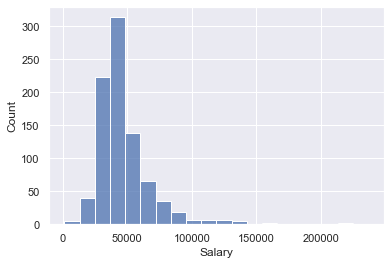

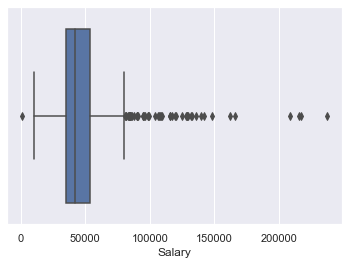

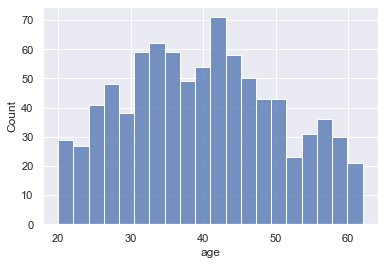

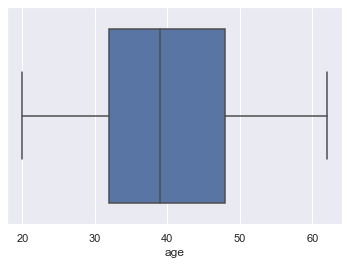

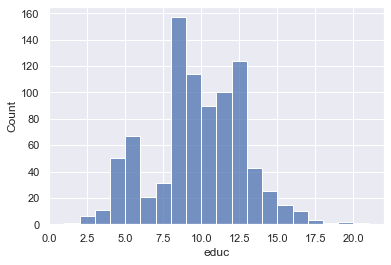

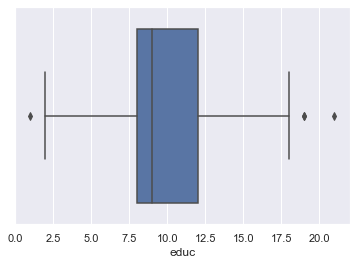

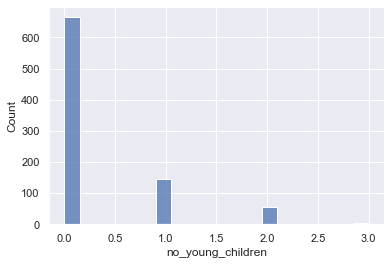

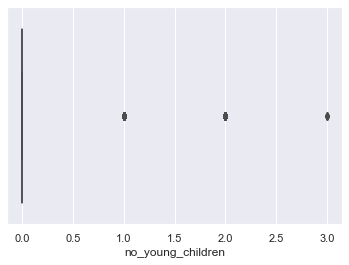

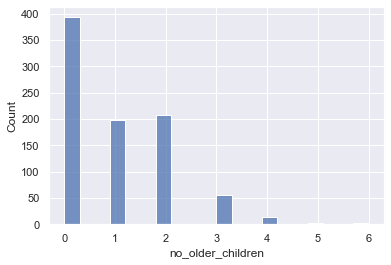

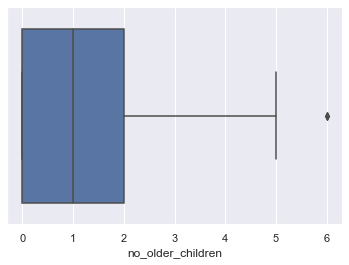

In [60]:
def univariateAnalysis(column, nbins):
    plt.figure()
    sns.histplot(data_df[column],bins= nbins, kde=False)
    plt.show()

    plt.figure()
    ax=sns.boxplot(x=data_df[column])
    plt.show()

hol = data_df.select_dtypes(include = ['float64', 'int64'])
hol_col = list(hol.columns.values)
len(hol_col)

for x in hol_col:
    univariateAnalysis(x, 20)

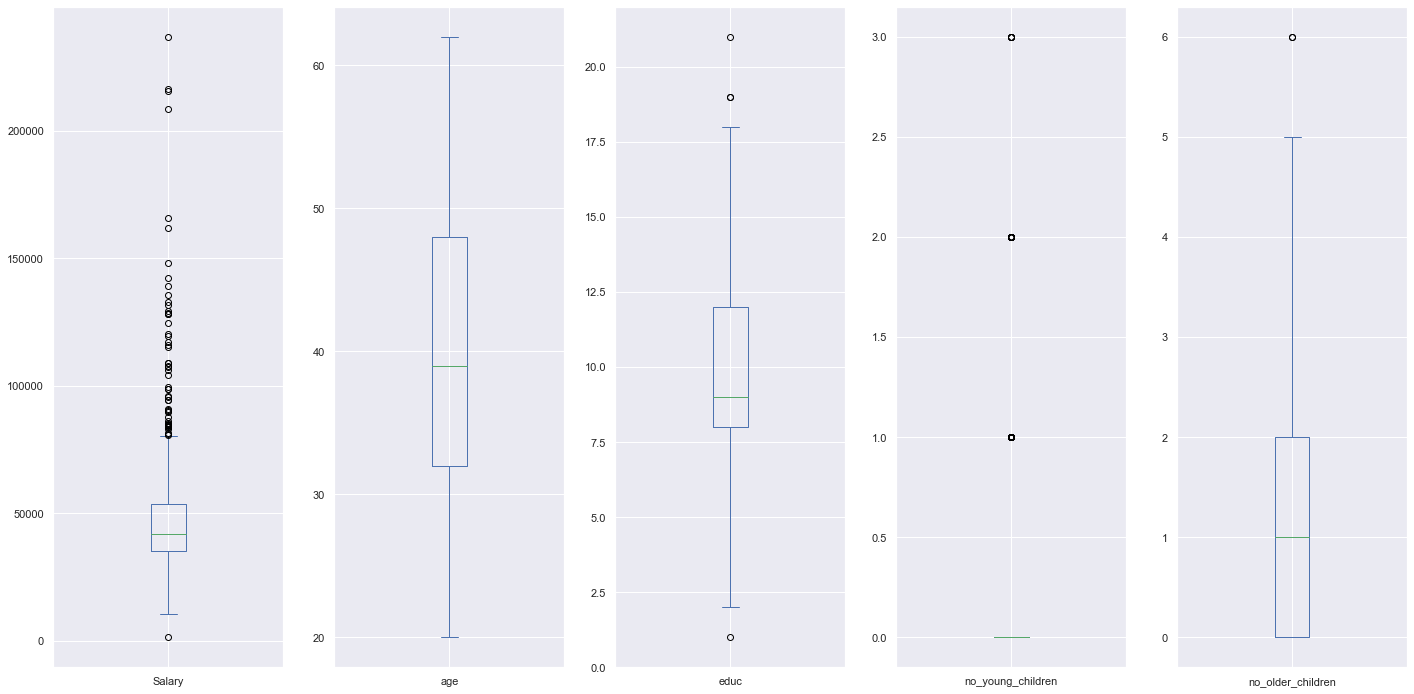

In [61]:
data_df.plot(kind='box',subplots=True,figsize=(20,10))
plt.tight_layout(pad=2.0)

In [63]:
numeric_cols = data_df.select_dtypes(include=[np.number]).columns
numeric_cols

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children'], dtype='object')

In [66]:
from scipy import stats

z=np.abs(stats.zscore(data_df['Salary']))
listin= np.where(z>3)

In [67]:
outlier = list((int(j) for i in listin for j in i))
print("the number of outliers are ", len(outlier) )

the number of outliers are  19


In [71]:
print("remove outliers")

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range
lower_range, upper_range=remove_outlier(data_df['Salary'])
data_df = data_df.loc[(data_df['Salary'] > lower_range) & (data_df['Salary'] < upper_range)]

remove outliers


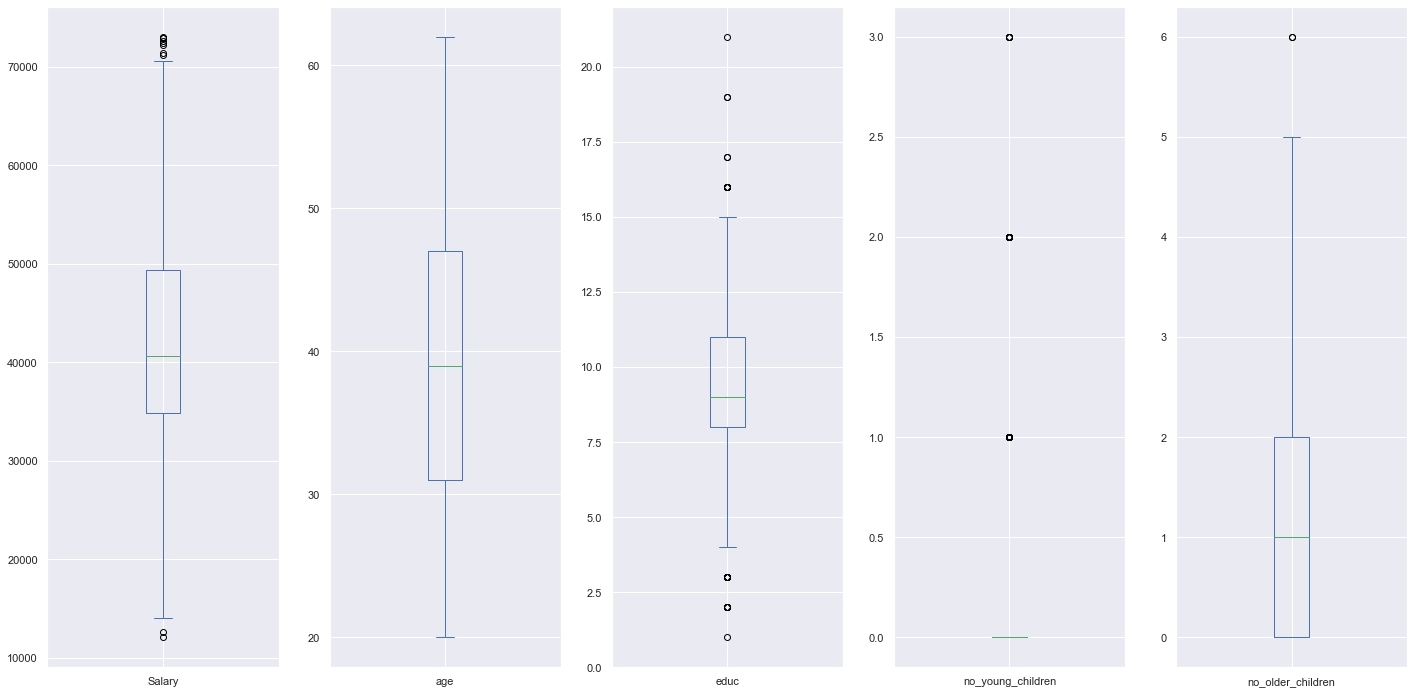

In [72]:
data_df.plot(kind='box',subplots=True,figsize=(20,10))
plt.tight_layout(pad=2.0)

In [73]:
print('no_young_children')
data_df['no_young_children'].value_counts()

no_young_children


0    598
1    136
2     50
3      5
Name: no_young_children, dtype: int64

In [75]:
for column in data_df.columns:
    if data_df[column].dtype == 'object':
        print(column.upper(),': ',data_df[column].nunique())
        print(data_df[column].value_counts().sort_values())
        print('\n')


HOLLIDAY_PACKAGE :  2
yes    379
no     410
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    206
no     583
Name: foreign, dtype: int64




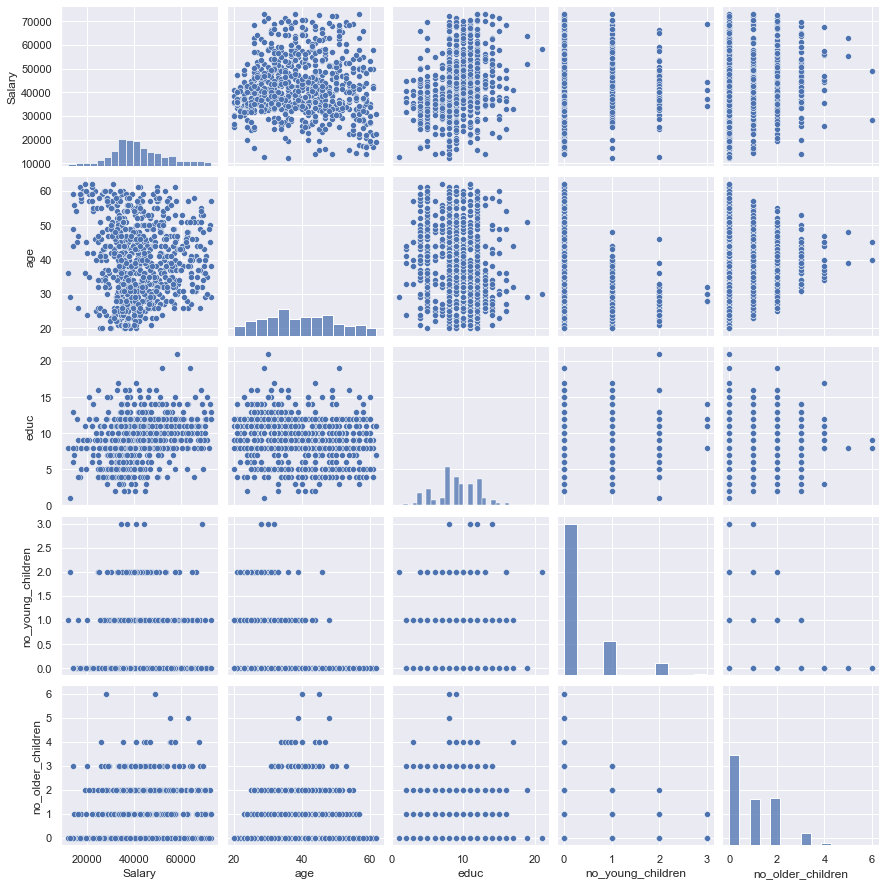

In [76]:
sns.pairplot(data_df)

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [78]:
data_df['foreign']=np.where(data_df['foreign'] =='yes', '1', data_df['foreign'])
data_df['foreign']=np.where(data_df['foreign'] =='no', '0', data_df['foreign'])
data_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,0
1,yes,37207,45,8,0,1,0
2,no,58022,46,9,0,0,0
3,no,66503,31,11,2,0,0
4,no,66734,44,12,0,2,0


In [79]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 789 entries, 0 to 870
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   789 non-null    object
 1   Salary             789 non-null    int64 
 2   age                789 non-null    int64 
 3   educ               789 non-null    int64 
 4   no_young_children  789 non-null    int64 
 5   no_older_children  789 non-null    int64 
 6   foreign            789 non-null    object
dtypes: int64(5), object(2)
memory usage: 81.6+ KB


In [81]:
X = np.asmatrix(data_df[['Salary','age','educ','no_young_children','no_older_children','foreign']])
Y = np.asarray(data_df['Holliday_Package'])
test_size = 0.30 # taking 70:30 training and test set
seed = 1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)


numpy.matrix

In [82]:
lgmodel = LogisticRegression(solver='liblinear')
lgmodel=lgmodel.fit(X_train, y_train)
lgmodel

C:\Users\Sharjil Shah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


LogisticRegression(solver='liblinear')

In [83]:
train_pred_lg=lgmodel.predict(X_train)
test_pred_lg =lgmodel.predict(X_test)

C:\Users\Sharjil Shah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Sharjil Shah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [84]:
train_pred_lg=lgmodel.predict(X_train)
test_pred_lg =lgmodel.predict(X_test)
modeldf=data_df.copy()
modeldf['predict_log_class']=lgmodel.predict(X)

C:\Users\Sharjil Shah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Sharjil Shah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Sharjil Shah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [85]:
clf = LinearDiscriminantAnalysis()
ldamodel=clf.fit(X_train, y_train)
ldamodel

C:\Users\Sharjil Shah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


LinearDiscriminantAnalysis()

In [86]:
train_pred_lda=ldamodel.predict(X_train)
test_pred_lda =ldamodel.predict(X_test)

C:\Users\Sharjil Shah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Sharjil Shah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [87]:
modeldf['predict_LDA_class']=ldamodel.predict(X)
modeldf['predict_LDA_class']

C:\Users\Sharjil Shah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0       no
1       no
2       no
3       no
4       no
      ... 
866    yes
867     no
868    yes
869    yes
870    yes
Name: predict_LDA_class, Length: 789, dtype: object

### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [88]:
print("Accuracy score for Logistic regression train variables ")
lgmodel_train_score = lgmodel.score(X_train, y_train)
print (lgmodel_train_score)

Accuracy score for Logistic regression train variables 
0.644927536231884


C:\Users\Sharjil Shah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [89]:
print("Accuracy score for Logistic regression test variables ")
lgmodel_test_score = lgmodel.score(X_test, y_test)
lgmodel_test_score

Accuracy score for Logistic regression test variables 


C:\Users\Sharjil Shah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.6877637130801688

 confusion matrix Train variables for logistic regression 


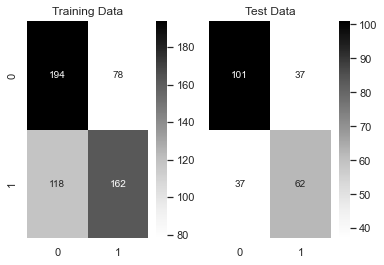

In [93]:
print(" confusion matrix Train variables for logistic regression ")
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False) #Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap(metrics.confusion_matrix(y_train, train_pred_lg),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap(metrics.confusion_matrix(y_test, test_pred_lg),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [96]:
print("Logistic regression Classfication report ")
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,train_pred_lg),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, test_pred_lg),'\n')

Logistic regression Classfication report 
Classification Report of the training data:

               precision    recall  f1-score   support

          no       0.62      0.71      0.66       272
         yes       0.68      0.58      0.62       280

    accuracy                           0.64       552
   macro avg       0.65      0.65      0.64       552
weighted avg       0.65      0.64      0.64       552
 

Classification Report of the test data:

               precision    recall  f1-score   support

          no       0.73      0.73      0.73       138
         yes       0.63      0.63      0.63        99

    accuracy                           0.69       237
   macro avg       0.68      0.68      0.68       237
weighted avg       0.69      0.69      0.69       237
 



AUC and ROC FOR Logistic regression
AUC for the Training Data: 0.701
AUC for the Test Data: 0.763


C:\Users\Sharjil Shah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Sharjil Shah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


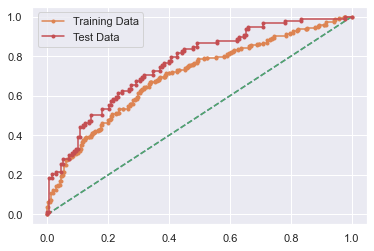

In [100]:
print("AUC and ROC FOR Logistic regression")
lg_pred_prob_train = lgmodel.predict_proba(X_train)
lg_pred_prob_test = lgmodel.predict_proba(X_test)

# AUC and ROC for the training data
# calculate AUC
lg_train_auc = metrics.roc_auc_score(y_train,lg_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lg_train_auc)

# calculate roc curve
lg_train_fpr, lg_train_tpr, thresholds = metrics.roc_curve(y_train,lg_pred_prob_train[:,1],pos_label='yes')
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(lg_train_fpr, lg_train_tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data
# calculate AUC
lg_test_auc = metrics.roc_auc_score(y_test,lg_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lg_test_auc)
# calculate roc curve
lg_test_fpr,lg_test_tpr, thresholds = metrics.roc_curve(y_test,lg_pred_prob_test[:,1],pos_label='yes')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lg_test_fpr, lg_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


In [101]:
print("Accuracy score for LDA train variables ")
ldamodel_train_score = ldamodel.score(X_train, y_train)
print (ldamodel_train_score)

Accuracy score for LDA train variables 
0.644927536231884


C:\Users\Sharjil Shah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [102]:
print("Accuracy score for LDA test variables ")
ldamodel_test_score = ldamodel.score(X_test, y_test)
ldamodel_test_score

Accuracy score for LDA test variables 


C:\Users\Sharjil Shah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.6877637130801688

 confusion matrix Train variables for LDA 


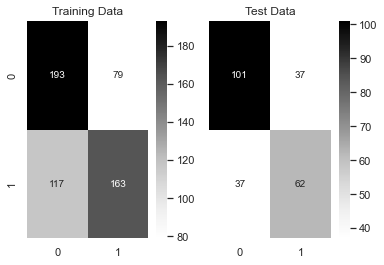

In [104]:
print(" confusion matrix Train variables for LDA ")
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,
train_pred_lda)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,
test_pred_lda)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [107]:
print("LDA Classfication report ")
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,train_pred_lda),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, test_pred_lda),'\n')

LDA Classfication report 
Classification Report of the training data:

               precision    recall  f1-score   support

          no       0.62      0.71      0.66       272
         yes       0.67      0.58      0.62       280

    accuracy                           0.64       552
   macro avg       0.65      0.65      0.64       552
weighted avg       0.65      0.64      0.64       552
 

Classification Report of the test data:

               precision    recall  f1-score   support

          no       0.73      0.73      0.73       138
         yes       0.63      0.63      0.63        99

    accuracy                           0.69       237
   macro avg       0.68      0.68      0.68       237
weighted avg       0.69      0.69      0.69       237
 



AUC and ROC FOR LDA
AUC for the Training Data: 0.700
AUC for the Test Data: 0.767


C:\Users\Sharjil Shah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Sharjil Shah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


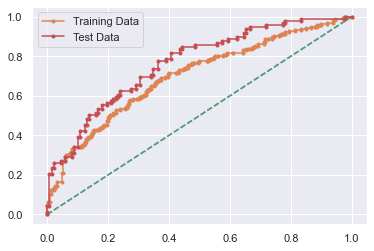

In [110]:
print("AUC and ROC FOR LDA")
lda_pred_prob_train = ldamodel.predict_proba(X_train)
lda_pred_prob_test = ldamodel.predict_proba(X_test)

# AUC and ROC for the training data
# calculate AUC
lda_train_auc = metrics.roc_auc_score(y_train,lda_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

# calculate roc curve
lda_train_fpr, lda_train_tpr, thresholds = metrics.roc_curve(y_train,lda_pred_prob_train[:,1],pos_label='yes')
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data
# calculate AUC
lda_test_auc = metrics.roc_auc_score(y_test,lda_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

# calculate roc curve
lda_test_fpr, lda_test_tpr, thresholds = metrics.roc_curve(y_test,lda_pred_prob_test[:,1],pos_label='yes')
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.',label='Test Data')

# show the plot
plt.legend(loc='best')
plt.show()

In [111]:
cmetrics=classification_report(y_train,train_pred_lg,output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
lg_train_f1=round(df.loc["yes"][2],2)
lg_train_recall=round(df.loc["yes"][1],2)
lg_train_precision=round(df.loc["yes"][0],2)
df

,precision,recall,f1-score,support
no,0.621795,0.713235,0.664384,272.000000
yes,0.675000,0.578571,0.623077,280.000000
accuracy,0.644928,0.644928,0.644928,0.644928
macro avg,0.648397,0.645903,0.643730,552.000000
weighted avg,0.648783,0.644928,0.643431,552.000000


In [112]:
cmetrics=classification_report(y_test,test_pred_lg,output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
lg_test_f1=round(df.loc["yes"][2],2)
lg_test_recall=round(df.loc["yes"][1],2)
lg_test_precision=round(df.loc["yes"][0],2)
df

,precision,recall,f1-score,support
no,0.731884,0.731884,0.731884,138.000000
yes,0.626263,0.626263,0.626263,99.000000
accuracy,0.687764,0.687764,0.687764,0.687764
macro avg,0.679073,0.679073,0.679073,237.000000
weighted avg,0.687764,0.687764,0.687764,237.000000


In [114]:
cmetrics=classification_report(y_train,train_pred_lda,output_dict=True
)
df=pd.DataFrame(cmetrics).transpose()
lda_train_f1=round(df.loc["yes"][2],2)
lda_train_recall=round(df.loc["yes"][1],2)
lda_train_precision=round(df.loc["yes"][0],2)
df

,precision,recall,f1-score,support
no,0.622581,0.709559,0.663230,272.000000
yes,0.673554,0.582143,0.624521,280.000000
accuracy,0.644928,0.644928,0.644928,0.644928
macro avg,0.648067,0.645851,0.643876,552.000000
weighted avg,0.648437,0.644928,0.643595,552.000000


In [116]:
cmetrics=classification_report(y_test,test_pred_lda,output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
lda_test_f1=round(df.loc["yes"][2],2)
lda_test_recall=round(df.loc["yes"][1],2)
lda_test_precision=round(df.loc["yes"][0],2)
df

,precision,recall,f1-score,support
no,0.731884,0.731884,0.731884,138.000000
yes,0.626263,0.626263,0.626263,99.000000
accuracy,0.687764,0.687764,0.687764,0.687764
macro avg,0.679073,0.679073,0.679073,237.000000
weighted avg,0.687764,0.687764,0.687764,237.000000


In [118]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic reg Train':[lgmodel_train_score,lg_train_auc,lg_train_recall,lg_train_precision,lg_train_f1],
                     'Logistic reg Test': [lgmodel_test_score,lg_test_auc,lg_test_recall,lg_test_precision,lg_test_f1],
                     'LDA Train': [ldamodel_train_score,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
                     'LDA Test': [ldamodel_test_score,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1]},index=index)
round(data,2)

,Logistic reg Train,Logistic reg Test,LDA Train,LDA Test
Accuracy,0.64,0.69,0.64,0.69
AUC,0.70,0.76,0.70,0.77
Recall,0.58,0.63,0.58,0.63
Precision,0.68,0.63,0.67,0.63
F1 Score,0.62,0.63,0.62,0.63


ROC curve for Train data 


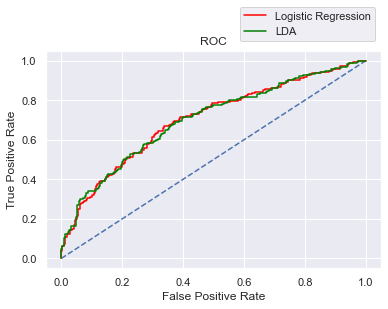

In [120]:
print("ROC curve for Train data ")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lg_train_fpr, lg_train_tpr,color='red',label="Logistic Regression")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

ROC curve for Test data


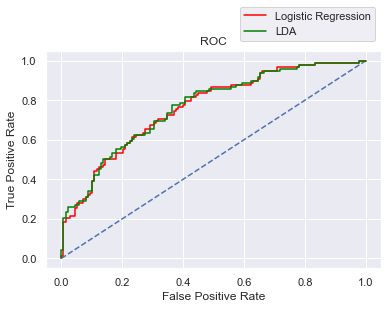

In [122]:
print("ROC curve for Test data")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lg_test_fpr, lg_test_tpr,color='red',label="Logistic Regression")
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')